In [148]:
%matplotlib inline

In [149]:
import os
import sys 

# Modify the path 
sys.path.append("..")

import yellowbrick as yb 
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston


## Using Yellowbrick to Boston Dataset

This is a user study to test YellowBrick library by exploring the Boston Dataset in sklearn. 

In [150]:
#loading the dataset, extracting the data, targets and feature names
boston = load_boston()
X = boston.data[:, None, 0]

# target contains the price
y = boston.target
# Use only one feature
features = boston.feature_names

In [151]:
print (boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [152]:
y.shape

(506,)

### Creating a LinearRegression model by splitting the data and targets into train & test datasets

In [153]:
## from sklearn.cross_validation import train_test_split as tts

from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot

model = LinearRegression()

# Split the data into training/testing sets
X_train = X[:-20]
X_test = X[-20:]

# Split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]


In [154]:
X_train.shape

(486, 1)

Coefficients: 
 [-0.42249408]
Variance score: -1.39


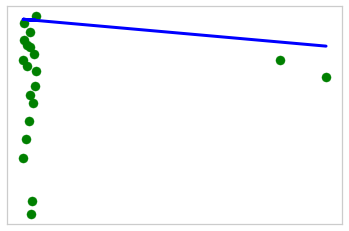

In [155]:

# Train the model using the training sets
model.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', model.coef_)

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model.score(X_test, y_test))

# Plot outputs
plt.scatter(X_test, y_test,  color='green')
plt.plot(X_test, model.predict(X_test), color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [156]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(model, X, y, cv=10)


In [157]:
y_pred.shape

(506,)

In [158]:
y.shape

(506,)

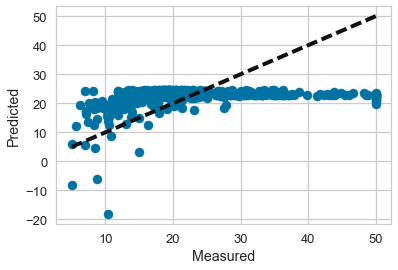

In [162]:
fig,ax = plt.subplots()

ax.scatter(y, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')


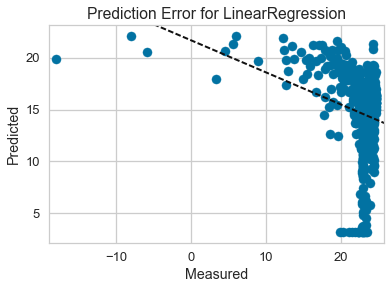

In [161]:
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import RegressionScoreVisualizer
y = y.reshape(-1, 1)
sviz = PredictionError(model)
sviz.score(y, y_pred)
sviz.poof() 

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)



In [ ]:
sviz = PredictionError(knn)
sviz.score(y, y_pred)
sviz.poof() 